# 1. Definición del Problema

Comprender qué tipo de vino debo consumir en consideración del meridaje y mi perfil sociodemográfico.

# 2. Obtención del conjunto de datos

    #1 SCRAPING - OBTENCIÓN DE HREF

In [10]:
# Librerias para la web scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as soup

# scrapping de la pagina: https://cav.cl/tienda
data_wine = []
driver = webdriver.Chrome()
for x in range(10):
    url = f"https://cav.cl/tienda?q=&hPP=100&idx=products&p={x}&fR%5Bfamily.name%5D%5B0%5D=Vinos&is_v=1"
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    info = []
    for article in page_soup.find_all("article"):
        id = article.attrs.get("data-id")
        sku = article.attrs.get("data-sku")
        name = article.attrs.get("data-name")
        brand = article.attrs.get("data-brand")
        category = article.attrs.get("data-category")
        variant = article.attrs.get("data-variant")
        ref = article.find("a").attrs.get("href")
        info.append([id, sku, name, brand, category, variant, ref])
    
    data_wine.append(info)
    
driver.quit()


In [11]:
# Redimensionar la data extraida
rs_data_wine = []

for sublist in data_wine:
    rs_data_wine.extend(sublist)
    
# primera vista de los datos
rs_data_wine

[['13665',
  '30366',
  'Pack Espumante La Capitana Chardonnay + Rose - Brut',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-espumante-la-capitana-chardonnay-rose-brut-30366'],
 ['14291',
  '31480',
  'Pack Copas Riedel Overture + Vino Clos De Luz Massal 1945',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-copas-riedel-overture-vino-clos-de-luz-massal-1945-31480'],
 ['14292',
  '31481',
  'Pack Decantandor U Joes + Vino Viña Andes Plateau Andesita Cs',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-decantandor-u-joes-vino-vina-andes-plateau-andesita-cs-31481'],
 ['14296',
  '31485',
  'Pack Arboleda Chardonnay 2021 + Sauvignon Blanc 2020',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-arboleda-chardonnay-2021-sauvignon-blanc-2020-31485'],
 ['14294',
  '31483',
  'Pack Aresti Trisquel Carmenere 2020 + Family Collection Car

In [12]:
# Importar libreria para crear dataframe
import pandas as pd

# Crear un Data Frame de la data extraida
productos_df = pd.DataFrame(rs_data_wine, columns=['id', 'sku', 'nombre', 'marca', 'categoria', 'variedad', 'url_ref'])
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14296,31485,Pack Arboleda Chardonnay 2021 + Sauvignon Blan...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-arboleda-chardonnay-2021...
4,14294,31483,Pack Aresti Trisquel Carmenere 2020 + Family C...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-aresti-trisquel-carmener...
...,...,...,...,...,...,...,...
1135,12483,28433,La Rosa Pack La Capitana S. V. 1 Carmenere + 1...,La Rosa,Tinto,Sin Informacion,/tienda/producto/la-rosa-pack-la-capitana-s-v-...
1136,1769,5935,Chandon Brut Rose,Chandon,Espumoso,Sin Informacion,/tienda/producto/chandon-brut-rose-5935
1137,13339,29648,Loma Larga Unfiltered Syrah 2014,Loma Larga,Tinto,Syrah,/tienda/producto/loma-larga-unfiltered-syrah-2...
1138,10682,26011,"Francois Lurton Espumante Rose ""Une"" Blanc De ...",Francois Lurton,Espumoso,Espumoso,/tienda/producto/francois-lurton-espumante-ros...


In [13]:
# Eliminar duplicados
productos_df.drop_duplicates("id", inplace=True)
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14296,31485,Pack Arboleda Chardonnay 2021 + Sauvignon Blan...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-arboleda-chardonnay-2021...
4,14294,31483,Pack Aresti Trisquel Carmenere 2020 + Family C...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-aresti-trisquel-carmener...
...,...,...,...,...,...,...,...
1135,12483,28433,La Rosa Pack La Capitana S. V. 1 Carmenere + 1...,La Rosa,Tinto,Sin Informacion,/tienda/producto/la-rosa-pack-la-capitana-s-v-...
1136,1769,5935,Chandon Brut Rose,Chandon,Espumoso,Sin Informacion,/tienda/producto/chandon-brut-rose-5935
1137,13339,29648,Loma Larga Unfiltered Syrah 2014,Loma Larga,Tinto,Syrah,/tienda/producto/loma-larga-unfiltered-syrah-2...
1138,10682,26011,"Francois Lurton Espumante Rose ""Une"" Blanc De ...",Francois Lurton,Espumoso,Espumoso,/tienda/producto/francois-lurton-espumante-ros...


In [14]:
# Eliminar los pack de varios productos
productos_df = productos_df.drop(productos_df[(productos_df["marca"] == "Sin Informacion") & (productos_df["categoria"] == "Sin Informacion") & (productos_df["variedad"] == "Sin Informacion")].index )
productos_df.reset_index(inplace=True)
productos_df

,index,id,sku,nombre,marca,categoria,variedad,url_ref
0,8,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,/tienda/producto/san-pedro-castillo-de-molina-...
1,9,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,/tienda/producto/la-rosa-cornellana-volcano-se...
2,10,12622,28655,Romelio Ensamblaje Tinto 2019,Reta,Ensamblaje Tinto,Ensamblaje Tinto,/tienda/producto/romelio-ensamblaje-tinto-2019...
3,11,12145,28023,J.bouchon Mingre Blend 2017,J. Bouchon,Ensamblaje Tinto,Sin Informacion,/tienda/producto/jbouchon-mingre-blend-2017-28023
4,12,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,/tienda/producto/san-pedro-castillo-de-molina-...
...,...,...,...,...,...,...,...,...
897,1135,12483,28433,La Rosa Pack La Capitana S. V. 1 Carmenere + 1...,La Rosa,Tinto,Sin Informacion,/tienda/producto/la-rosa-pack-la-capitana-s-v-...
898,1136,1769,5935,Chandon Brut Rose,Chandon,Espumoso,Sin Informacion,/tienda/producto/chandon-brut-rose-5935
899,1137,13339,29648,Loma Larga Unfiltered Syrah 2014,Loma Larga,Tinto,Syrah,/tienda/producto/loma-larga-unfiltered-syrah-2...
900,1138,10682,26011,"Francois Lurton Espumante Rose ""Une"" Blanc De ...",Francois Lurton,Espumoso,Espumoso,/tienda/producto/francois-lurton-espumante-ros...


In [15]:
# Eliminar la columna "index" y completar la información de la columna "url_ref"
productos_df.drop(["index"], axis=1, inplace=True)
productos_df['url_ref'] = 'https://cav.cl/' + productos_df['url_ref'].astype(str)
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,14041,30991,San Pedro Castillo De Molina Carmenere Gran Re...,San Pedro,Tinto,Carmenere,https://cav.cl//tienda/producto/san-pedro-cast...
1,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,https://cav.cl//tienda/producto/la-rosa-cornel...
2,12622,28655,Romelio Ensamblaje Tinto 2019,Reta,Ensamblaje Tinto,Ensamblaje Tinto,https://cav.cl//tienda/producto/romelio-ensamb...
3,12145,28023,J.bouchon Mingre Blend 2017,J. Bouchon,Ensamblaje Tinto,Sin Informacion,https://cav.cl//tienda/producto/jbouchon-mingr...
4,12840,28813,San Pedro Castillo De Molina Tributo Gran Rese...,San Pedro,Tinto,Cabernet Sauvignon,https://cav.cl//tienda/producto/san-pedro-cast...
...,...,...,...,...,...,...,...
897,12483,28433,La Rosa Pack La Capitana S. V. 1 Carmenere + 1...,La Rosa,Tinto,Sin Informacion,https://cav.cl//tienda/producto/la-rosa-pack-l...
898,1769,5935,Chandon Brut Rose,Chandon,Espumoso,Sin Informacion,https://cav.cl//tienda/producto/chandon-brut-r...
899,13339,29648,Loma Larga Unfiltered Syrah 2014,Loma Larga,Tinto,Syrah,https://cav.cl//tienda/producto/loma-larga-unf...
900,10682,26011,"Francois Lurton Espumante Rose ""Une"" Blanc De ...",Francois Lurton,Espumoso,Espumoso,https://cav.cl//tienda/producto/francois-lurto...


In [16]:
productos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         902 non-null    object
 1   sku        902 non-null    object
 2   nombre     902 non-null    object
 3   marca      902 non-null    object
 4   categoria  902 non-null    object
 5   variedad   902 non-null    object
 6   url_ref    902 non-null    object
dtypes: object(7)
memory usage: 49.5+ KB


In [17]:
import sqlite3

conn = sqlite3.connect("../data/wine_store.db")
productos_df.to_sql("productos", conn, if_exists="replace", index=False)
conn.close()

    #2 SCRAPING - DESCRIPCIÓN DE LOS PRODUCTOS MEDIANTE EL ACCESO A HREF

In [18]:
# Leer la tabla productos como dataframe
con = sqlite3.connect("../data/raw/wine_store.db")
select_productos =  "SELECT * FROM productos;"
productos_df = pd.read_sql_query(select_productos, con)

# Leer las URL desde productos_df
url_list = []
for index, row in productos_df.iterrows():
    url = row["url_ref"]
    url_list.append(url)

url_list

['https://cav.cl//tienda/producto/almaviva-epu-2019-en-estuche-30972',
 'https://cav.cl//tienda/producto/miguel-torres-manso-de-velasco-2019-30348',
 'https://cav.cl//tienda/producto/bisquertt-tralca-2015-26142',
 'https://cav.cl//tienda/producto/concha-y-toro-terrunyo-carmenere-2021-31586',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-carmenere-2020-30744',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-cabernet-franc-2020-30743',
 'https://cav.cl//tienda/producto/aresti-codigo-de-familia-380-2014-28978',
 'https://cav.cl//tienda/producto/valle-secreto-profundo-ensamblaje-tinto-2017-29662',
 'https://cav.cl//tienda/producto/chateau-los-boldos-amalia-blend-2017-30735',
 'https://cav.cl//tienda/producto/valdivieso-caballo-loco-grand-cru-blanc-de-noir-23844',
 'https://cav.cl//tienda/producto/la-rosa-la-rosa-cabernet-franc-2019-28532',
 'https://cav.cl//tienda/producto/ps-garcia-bravado-ensamblaje-tinto-2019-30196',
 'https://cav.cl

In [19]:
import requests
from bs4 import BeautifulSoup

# Crear una lista para almacenar los datos de cada producto
all_product_data = []

for url in url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Acceder a los atributos 'data-*' de la etiqueta 'section'
    product_section = soup.select_one('section.c-product')

    product_id = product_section['data-id']
    product_sku = product_section['data-sku']
    product_name = product_section['data-name']
    product_brand = product_section['data-brand']
    product_category = product_section['data-category']
    product_variant = product_section['data-variant']
    product_price = product_section['data-price']

    # Acceder a la ficha técnica
    wine_table = soup.find('table', class_='table table-striped')

    # Inicializar variables para los campos de la tabla
    wine_data = {
        "vinyard": "",
        "strain": "",
        "harvest": "",
        "origin": "",
        "line": "",
        "format": "",
        "type": "",
        "alcohol_degrees": "",
        "blend": "",
        "guard": "",
        "pairing": ""
    }

    if wine_table:
        # Obtener todas las filas de la tabla
        rows = wine_table.find_all('tr')

        for row in rows:
            header = row.find('th')
            data = row.find('td')

            if header and data:
                header_text = header.text.strip()
                data_text = data.text.strip()

                # Asignar los datos a las categorías correspondientes
                if header_text in wine_data:
                    wine_data[header_text] = data_text

    # Acceder al puntaje y calificaciones
    score_section = product_section.select_one('.c-product__score')

    if score_section is not None:
        lacav_score_element = score_section.select_one('.o-score--lacav .o-score__points')
        if lacav_score_element is not None:
            lacav_score = lacav_score_element.text
        else:
            lacav_score = "No score available"
    else:
        lacav_score = "No score available"

    # description
    description = soup.select_one('.c-product__body p').text.strip()

    # Información de precios y stock
    price_info = soup.select_one('.c-product__price')
    socio_price = price_info.select('p.o-text--price-store')[0].text
    normal_price = price_info.select('p.o-text--small')[0].text
    stock = price_info.select('p.o-text--small')[1].text

    # Acceder a la image_url
    product_image = soup.select_one('div.c-product__thumb img')['src']

    # Acceder a la sección de percepción
    sheet_body = soup.select_one('div.c-sheet__body')
    dl_elements = sheet_body.find_all('dl', class_='c-sheet__feature--chart') if sheet_body else []

    perception_data = {}

    for dl in dl_elements:
        # Acceder al contenido de c-sheet__signify
        signify = dl.select_one('dd.c-sheet__signify').text.strip()

        # Acceder al contenido de c-chart__track
        chart_track = dl.select_one('div.c-chart__track')
        chart_class_element = chart_track.find('div', class_='c-chart__percent') if chart_track else None
        if chart_class_element and 'class' in chart_class_element.attrs:
            chart_class = chart_class_element['class'][1]

        # Mapear chart_class a su valor correspondiente
        chart_class_map = {
            'c-chart__percent--0': 0,
            'c-chart__percent--20': 0.2,
            'c-chart__percent--40': 0.4,
            'c-chart__percent--60': 0.6,
            'c-chart__percent--80': 0.8,
            'c-chart__percent--100': 1
        }
        chart_value = chart_class_map.get(chart_class, None)

        perception_data[signify] = chart_value

    # Crear un diccionario con la información
    product_data = {
        "url_product": url,
        "product_internal_id": product_id,
        "product_code": product_sku,
        "product_name": product_name,
        "product_brand": product_brand,
        "product_category": product_category,
        "variant": product_variant,
        "price": product_price,
        "cav_points": lacav_score,
        "description": description,
        "member_price": socio_price,
        "normal_price": normal_price,
        "stock": stock,
        "image_url": product_image,
        "vinyard": wine_data["vinyard"],
        "strain": wine_data["strain"],
        "harvest": wine_data["harvest"],
        "origin": wine_data["origin"],
        "line": wine_data["line"],
        "format": wine_data["format"],
        "type": wine_data["type"],
        "alcohol_degrees": wine_data["alcohol_degrees"],
        "blend": wine_data["blend"],
        "guard": wine_data["guard"],
        "pairing": wine_data["pairing"],
        **perception_data  # Agregar datos de percepción
    }

    all_product_data.append(product_data)

In [20]:
import pandas as pd
descripcion_productos_df = pd.DataFrame(all_product_data)
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,format,type,alcohol_degrees,blend,guard,pairing,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,,,,,,,NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,,,,,,,0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,,,,,,,NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,,,,,,,NaN,NaN,NaN,NaN
994,https://cav.cl//tienda/producto/arboleda-pinot...,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
995,https://cav.cl//tienda/producto/arboleda-chard...,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,18190,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
996,https://cav.cl//tienda/producto/arboleda-sauvi...,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz perfumada, lima, cebollí...",...,,,,,,,1.0,0.6,0.6,0.4


In [21]:
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,format,type,alcohol_degrees,blend,guard,pairing,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,,,,,,,NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,,,,,,,0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,,,,,,,NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,,,,,,,NaN,NaN,NaN,NaN
994,https://cav.cl//tienda/producto/arboleda-pinot...,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
995,https://cav.cl//tienda/producto/arboleda-chard...,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,18190,No score available,,...,,,,,,,NaN,NaN,NaN,NaN
996,https://cav.cl//tienda/producto/arboleda-sauvi...,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz perfumada, lima, cebollí...",...,,,,,,,1.0,0.6,0.6,0.4


In [22]:
descripcion_productos_df.to_csv('productos.csv', index=False)

In [23]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/raw/wine_store.db")
query = "SELECT * FROM descripcion_productos;"
descripcion_productos_df = pd.read_sql_query(query, con)
con.close()

descripcion_productos_df.head()

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,750 Cc,Ensamblaje Tinto,14°,CS/CA/SY,Guardar 3 años,"Carnes Rojas, Carnes de Caza.",0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN


# 3. Almacenamiento de la información

In [24]:
import pandas as pd

productos = descripcion_productos_df
meridaje = pd.read_csv('../data/raw/meridaje.csv')
ranking = pd.read_csv('../data/raw/ranking.csv') 

In [25]:
import sqlite3

conn = sqlite3.connect("../data/wine_store.db")
productos.to_sql("productos", conn, if_exists="replace", index=False)
meridaje.to_sql("meridaje", conn, if_exists="replace", index=False)
ranking.to_sql("ranking", conn, if_exists="replace", index=False)

3604

In [26]:
query = """
SELECT *
FROM productos
JOIN meridaje
ON productos.variant = meridaje.variant
LEFT JOIN ranking
ON productos.product_brand = ranking.brand
;
"""

df = pd.read_sql_query(query, conn)

# Eliminar  duplicadasfilas
df = df.loc[:, ~df.columns.duplicated()]

# Renombrar columnas 
df = df.rename(columns={'Cuerpo':'body','Astringencia':'astringency','Frescor':'freshness','Dulzura':'sweetness'}) 

# Crear tabla "wine_database"
df.to_sql("wine_database", conn, if_exists="replace", index=False)

conn.close()

In [27]:
df


,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,freshness,body,sweetness,astringency,pairing,brand,gender,age,ses,rank
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Carne de Res,Almaviva,MUJER,55-75,C2,61.0
1,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Carne de Res,Almaviva,MUJER,55-75,D/E,49.0
2,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Cilantro,Almaviva,MUJER,55-75,C2,61.0
3,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Cilantro,Almaviva,MUJER,55-75,D/E,49.0
4,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Colby,Almaviva,MUJER,55-75,C2,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,https://cav.cl//tienda/producto/arboleda-sauvi...,10569,25887,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz muy verde, pimiento verd...",...,0.8,0.6,0.6,0.6,Tomillo,None,None,None,None,NaN
49822,https://cav.cl//tienda/producto/arboleda-sauvi...,10569,25887,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz muy verde, pimiento verd...",...,0.8,0.6,0.6,0.6,Trucha,None,None,None,None,NaN
49823,https://cav.cl//tienda/producto/arboleda-sauvi...,10569,25887,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz muy verde, pimiento verd...",...,0.8,0.6,0.6,0.6,Zanahoria,None,None,None,None,NaN
49824,https://cav.cl//tienda/producto/arboleda-sauvi...,10569,25887,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz muy verde, pimiento verd...",...,0.8,0.6,0.6,0.6,Zapallo,None,None,None,None,NaN


# 4. Análisis descriptivo

In [28]:
import sqlite3
import pandas as pd

con = sqlite3.connect("../data/wine_store.db")

# Leer tabla "wine_database"
query = "SELECT * FROM wine_database;"
wine_products_df = pd.read_sql_query(query, con)

conn.close()

In [29]:
wine_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49826 entries, 0 to 49825
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url_product          49826 non-null  object 
 1   product_internal_id  49826 non-null  object 
 2   product_code         49826 non-null  object 
 3   product_name         49826 non-null  object 
 4   product_brand        49826 non-null  object 
 5   product_category     49826 non-null  object 
 6   variant              49826 non-null  object 
 7   price                49826 non-null  object 
 8   cav_points           49826 non-null  object 
 9   description          49826 non-null  object 
 10  member_price         49826 non-null  object 
 11  normal_price         49826 non-null  object 
 12  stock                49826 non-null  object 
 13  image_url            49826 non-null  object 
 14  vina                 49826 non-null  object 
 15  cepa                 49826 non-null 

In [30]:
wine_products_df.head()

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,freshness,body,sweetness,astringency,pairing,brand,gender,age,ses,rank
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Carne de Res,Almaviva,MUJER,55-75,C2,61.0
1,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Carne de Res,Almaviva,MUJER,55-75,D/E,49.0
2,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Cilantro,Almaviva,MUJER,55-75,C2,61.0
3,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Cilantro,Almaviva,MUJER,55-75,D/E,49.0
4,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,NaN,NaN,NaN,NaN,Colby,Almaviva,MUJER,55-75,C2,61.0


In [31]:
wine_products_df.describe(include="all")

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,freshness,body,sweetness,astringency,pairing,brand,gender,age,ses,rank
count,49826,49826,49826,49826,49826,49826,49826,49826,49826,49826,...,14138.000000,14138.000000,14138.000000,14138.000000,49826,26470,26470,26470,26470,26470.000000
unique,882,882,882,882,176,8,38,171,12,436,...,NaN,NaN,NaN,NaN,114,57,3,6,4,NaN
top,https://cav.cl//tienda/producto/ovni-wines-oct...,13988,30822,Ovni Wines Octavo Pasajero Carignan 2019,Calyptra,Tinto,Sauvignon Blanc,15990,No score available,,...,NaN,NaN,NaN,NaN,Carne de Res,Calyptra,MUJER,25-34,C2,NaN
freq,1470,1470,1470,1470,1680,30871,6667,5398,28835,20778,...,NaN,NaN,NaN,NaN,1348,1680,16104,7702,8289,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.779375,0.743599,0.463305,0.515434,NaN,NaN,NaN,NaN,NaN,87.905478
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.160670,0.224071,0.174587,0.271388,NaN,NaN,NaN,NaN,NaN,36.100560
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.400000,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800000,0.600000,0.400000,0.400000,NaN,NaN,NaN,NaN,NaN,61.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800000,0.800000,0.400000,0.400000,NaN,NaN,NaN,NaN,NaN,86.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.800000,1.000000,0.600000,0.600000,NaN,NaN,NaN,NaN,NaN,114.000000


In [32]:
# Reemplazar todos los NaN por el valor siguiente en cada columna
wine_products_df.fillna(method='bfill', inplace=True)

# Si también quieres asegurarte de que los últimos valores nulos sean llenados,
# puedes aplicar el método 'ffill' después de 'bfill'.
wine_products_df.fillna(method='ffill', inplace=True)

In [33]:
wine_products_df.columns

Index(['url_product', 'product_internal_id', 'product_code', 'product_name',
       'product_brand', 'product_category', 'variant', 'price', 'cav_points',
       'description', 'member_price', 'normal_price', 'stock', 'image_url',
       'vina', 'cepa', 'cosecha', 'procedencia', 'linea', 'formato', 'tipo',
       'alcohol', 'mezcla', 'guarda', 'maridaje', 'freshness', 'body',
       'sweetness', 'astringency', 'pairing', 'brand', 'gender', 'age', 'ses',
       'rank'],
      dtype='object')

In [34]:
wine_products_df.drop(["url_product", "product_internal_id", "product_code", "cav_points", "member_price", "normal_price", "stock",
                       "procedencia", "linea", "formato", "ses"], axis=1, inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df

,index,product_name,product_brand,product_category,variant,price,description,image_url,vina,cepa,...,maridaje,freshness,body,sweetness,astringency,pairing,brand,gender,age,rank
0,0,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Ensamblaje Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Carne de Res,Almaviva,MUJER,55-75,61.0
1,1,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Ensamblaje Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Carne de Res,Almaviva,MUJER,55-75,49.0
2,2,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Ensamblaje Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Cilantro,Almaviva,MUJER,55-75,61.0
3,3,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Ensamblaje Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Cilantro,Almaviva,MUJER,55-75,49.0
4,4,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Ensamblaje Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Colby,Almaviva,MUJER,55-75,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,49821,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Tomillo,Kalfu,MUJER,55-75,81.0
49822,49822,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Trucha,Kalfu,MUJER,55-75,81.0
49823,49823,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Zanahoria,Kalfu,MUJER,55-75,81.0
49824,49824,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Zapallo,Kalfu,MUJER,55-75,81.0


In [35]:
wine_products_df.columns

Index(['index', 'product_name', 'product_brand', 'product_category', 'variant',
       'price', 'description', 'image_url', 'vina', 'cepa', 'cosecha', 'tipo',
       'alcohol', 'mezcla', 'guarda', 'maridaje', 'freshness', 'body',
       'sweetness', 'astringency', 'pairing', 'brand', 'gender', 'age',
       'rank'],
      dtype='object')

In [36]:
wine_products_df["product_category"].unique()

array(['Ensamblaje Tinto', 'Tinto', 'Espumoso', 'Blanco', 'Dulce',
       'Sin Informacion', 'Ensamblaje Blanco', 'Rosado'], dtype=object)

In [37]:
wine_products_df.replace(regex={"Ensamblaje Tinto":"Tinto", "Ensamblaje Blanco":"Blanco", "Naranjo":"Blanco"}, inplace=True)
wine_products_df

,index,product_name,product_brand,product_category,variant,price,description,image_url,vina,cepa,...,maridaje,freshness,body,sweetness,astringency,pairing,brand,gender,age,rank
0,0,Almaviva Epu 2019 En Estuche,Almaviva,Tinto,Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Carne de Res,Almaviva,MUJER,55-75,61.0
1,1,Almaviva Epu 2019 En Estuche,Almaviva,Tinto,Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Carne de Res,Almaviva,MUJER,55-75,49.0
2,2,Almaviva Epu 2019 En Estuche,Almaviva,Tinto,Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Cilantro,Almaviva,MUJER,55-75,61.0
3,3,Almaviva Epu 2019 En Estuche,Almaviva,Tinto,Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Cilantro,Almaviva,MUJER,55-75,49.0
4,4,Almaviva Epu 2019 En Estuche,Almaviva,Tinto,Tinto,42990,"Rojo rubí, ribetes violetas. Notas frutales, f...",https://cav.cl/storage/sku_images/30972.jpg,Almaviva,Tinto,...,"Carnes Rojas, Carnes de Caza.",0.8,0.6,0.6,0.6,Colby,Almaviva,MUJER,55-75,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,49821,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Tomillo,Kalfu,MUJER,55-75,81.0
49822,49822,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Trucha,Kalfu,MUJER,55-75,81.0
49823,49823,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Zanahoria,Kalfu,MUJER,55-75,81.0
49824,49824,Arboleda Sauvignon Blanc 2018,Arboleda,Blanco,Sauvignon Blanc,18190,"Amarillo plata. Nariz muy verde, pimiento verd...",https://cav.cl/storage/sku_images/25887.jpg,Arboleda,Sauvignon Blanc,...,"Pescados, Mariscos.",0.8,0.6,0.6,0.6,Zapallo,Kalfu,MUJER,55-75,81.0


In [38]:
pairing_df = wine_products_df[["product_name", "product_category", "price", "image_url", "pairing", "gender", "age", "rank"]].copy()
pairing_df

,product_name,product_category,price,image_url,pairing,gender,age,rank
0,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Carne de Res,MUJER,55-75,61.0
1,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Carne de Res,MUJER,55-75,49.0
2,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Cilantro,MUJER,55-75,61.0
3,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Cilantro,MUJER,55-75,49.0
4,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Colby,MUJER,55-75,61.0
...,...,...,...,...,...,...,...,...
49821,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Tomillo,MUJER,55-75,81.0
49822,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Trucha,MUJER,55-75,81.0
49823,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Zanahoria,MUJER,55-75,81.0
49824,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Zapallo,MUJER,55-75,81.0


In [39]:
pairing_df['price'] = pairing_df['price'].astype('int')

In [40]:
pairing_df["product_name"].nunique()

882

In [41]:
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49826 entries, 0 to 49825
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      49826 non-null  object 
 1   product_category  49826 non-null  object 
 2   price             49826 non-null  int64  
 3   image_url         49826 non-null  object 
 4   pairing           49826 non-null  object 
 5   gender            49826 non-null  object 
 6   age               49826 non-null  object 
 7   rank              49826 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


# 5. EDA (Exploratory data analysis)

In [42]:
print(pairing_df['price'].describe())

count     49826.000000
mean      18010.484085
std       19504.281637
min        4200.000000
25%       10200.000000
50%       13990.000000
75%       16990.000000
max      210000.000000
Name: price, dtype: float64


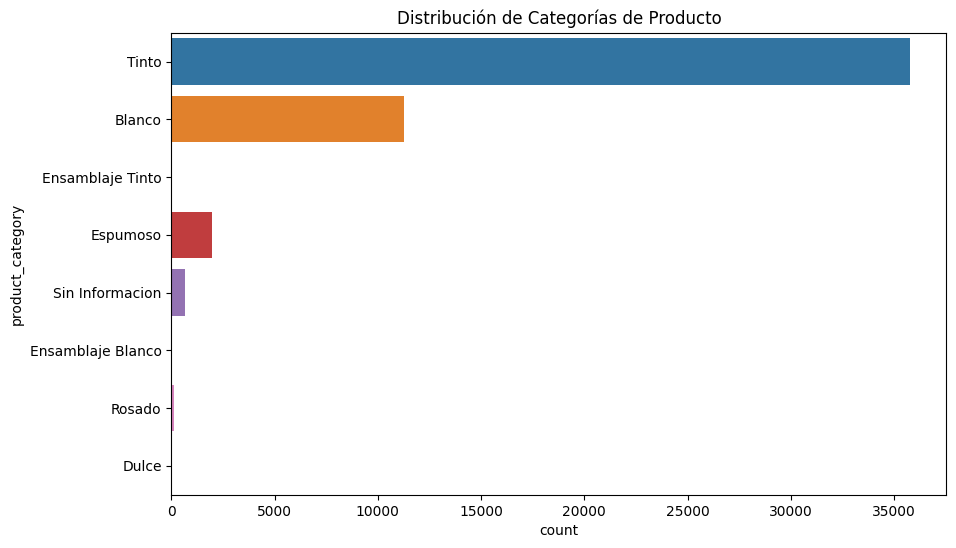

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de 'product_category'
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=pairing_df, order = df['product_category'].value_counts().index)
plt.title('Distribución de Categorías de Producto')
plt.show()

In [44]:
# Información porcentual de los datos faltantes
pairing_df.isnull().mean() * 100

product_name        0.0
product_category    0.0
price               0.0
image_url           0.0
pairing             0.0
gender              0.0
age                 0.0
rank                0.0
dtype: float64

In [45]:
from collections import Counter
import itertools

# Alimentos más repetidos para pairing
all_pairings = list(itertools.chain(*df['pairing'].str.split()))
pairing_counts = Counter(all_pairings)
print(pairing_counts.most_common(10))

[('Frijoles', 2696), ('de', 1678), ('Carne', 1348), ('Res', 1348), ('Colby', 1348), ('Cordero', 1348), ('Blancos', 1348), ('Negos', 1348), ('Gouda', 1348), ('Judía', 1348)]


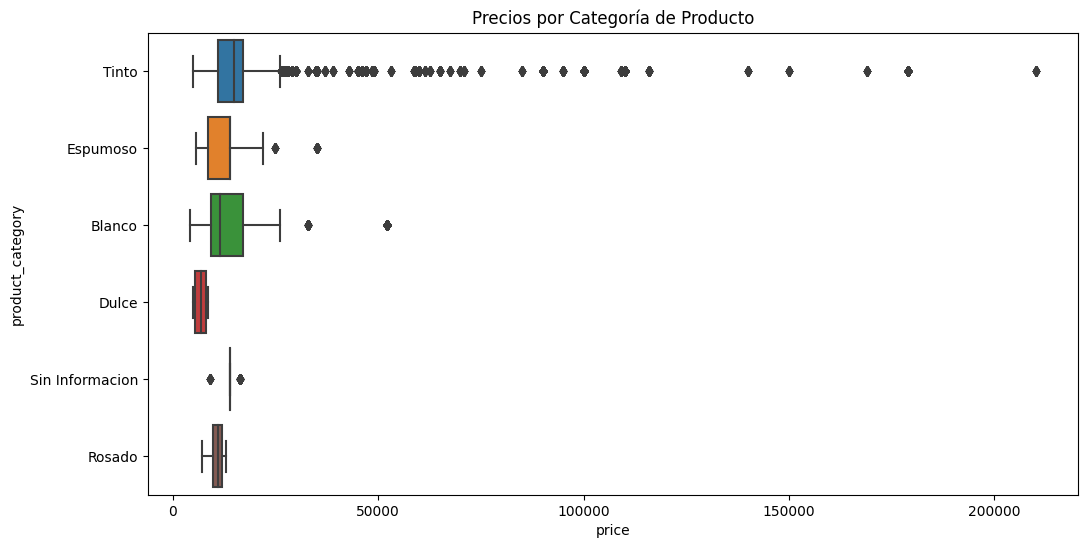

In [46]:
# Diagrama de cajas para precios por categoría de producto
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='product_category', data=pairing_df)
plt.title('Precios por Categoría de Producto')
plt.show()

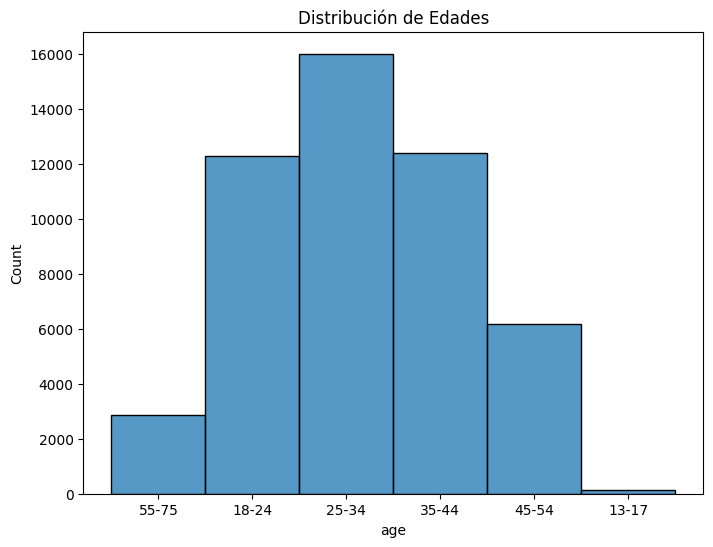

In [47]:
# Histograma de edades
plt.figure(figsize=(8, 6))
sns.histplot(pairing_df['age'].dropna())  
plt.title('Distribución de Edades')
plt.show()

In [48]:
g = sns.FacetGrid(pairing_df, col='product_category', row='pairing', margin_titles=True)
g.map(sns.histplot, 'price', kde=False, bins=15)
g.add_legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


# 6. Entrenamiento Modelo

In [49]:
df = pairing_df


In [50]:
df

,product_name,product_category,price,image_url,pairing,gender,age,rank
0,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Carne de Res,MUJER,55-75,61.0
1,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Carne de Res,MUJER,55-75,49.0
2,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Cilantro,MUJER,55-75,61.0
3,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Cilantro,MUJER,55-75,49.0
4,Almaviva Epu 2019 En Estuche,Tinto,42990,https://cav.cl/storage/sku_images/30972.jpg,Colby,MUJER,55-75,61.0
...,...,...,...,...,...,...,...,...
49821,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Tomillo,MUJER,55-75,81.0
49822,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Trucha,MUJER,55-75,81.0
49823,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Zanahoria,MUJER,55-75,81.0
49824,Arboleda Sauvignon Blanc 2018,Blanco,18190,https://cav.cl/storage/sku_images/25887.jpg,Zapallo,MUJER,55-75,81.0


In [51]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors


# Filtrando las columnas relevantes
data = df[['product_name', 'product_category','price', 'pairing', 'gender', 'age', 'rank', 'image_url']]

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='most_frequent')
df[['gender', 'age', 'rank']] = imputer.fit_transform(df[['gender', 'age', 'rank']])

# Codificación One-Hot para variables categóricas
one_hot_encoder = OneHotEncoder(sparse=False)
categorical_columns = ['gender', 'age']
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = one_hot_encoder.get_feature_names_out(categorical_columns)

# Normalización de variables numéricas
scaler = MinMaxScaler()
numeric_columns = ['price', 'rank']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Combinar las columnas codificadas y normalizadas
df = pd.concat([df, df_encoded], axis=1).drop(categorical_columns, axis=1)

# Limpieza final
df = df.dropna()

# Agrupar datos por nombre de producto y maridajes
df_agrupado = df.groupby('product_name')['pairing'].apply(lambda x: ', '.join(set(x))).reset_index()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Asumiendo que df es tu DataFrame y 'label' es el nombre de la columna de etiquetas
# Separar características y etiquetas
X = df.drop(['product_name', 'product_category', 'pairing', 'image_url'], axis=1)  # Todas las columnas excepto la de etiquetas
y = df['product_name']  # Columna de etiquetas

# Asegúrate de que los índices en X_train correspondan a df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

product_names = df['product_name']
X_train_indexed = X_train.join(product_names)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7189444109973911


In [53]:
from joblib import dump

dump(knn, '../models/knn_wine_model.joblib')


['../models/knn_wine_model.joblib']

In [54]:
def get_recommendations_by_pairings_gender_and_ses(pairing_inputs, gender_input, age_input, k=5):
    # Identificar las columnas de género y SES después del one-hot encoding
    gender_column = f'gender_{gender_input}'
    age_column = f'age_{age_input}'


    # Verificar si las columnas existen
    if gender_column not in df.columns or age_column not in df.columns:
        return "Género o Rango etario  no se encuentra disponible en los datos."

    # Pre-filtrado basado en maridajes, género y SES
    df_filtrado = df[df['product_name'].isin(df_agrupado[df_agrupado['pairing'].apply(lambda x: all(pairing in x for pairing in pairing_inputs))]['product_name'])]
    df_filtrado = df_filtrado[(df_filtrado[gender_column] == 1) & (df_filtrado[age_column] == 1)]

    if df_filtrado.empty:
        return []

    # Inicializar el modelo k-NN
    knn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(df_filtrado.drop(['product_name','product_category', 'pairing', 'image_url'], axis=1))

    recommendations = []
    for product_name in df_filtrado['product_name'].unique():
        # Obtener las características del producto
        product_features = df_filtrado[df_filtrado['product_name'] == product_name].drop(['product_name','product_category', 'pairing', 'image_url'], axis=1)

        if not product_features.empty:
            # Utilizar la media de las características si hay múltiples filas para el mismo producto
            product_feature_avg = product_features.mean().values.reshape(1, -1)

            # Obtener recomendaciones utilizando k-NN
            distances, indices = knn.kneighbors(product_feature_avg, n_neighbors=k)
            for idx in indices[0]:
                recommended_product_name = df_filtrado.iloc[idx]['product_name']
                recommendations.append(recommended_product_name)

    return list(set(recommendations))  # Eliminar duplicados

In [55]:
pairing_inputs = ['Carne de Res', 'Cheddar', 'Comino']  # Lista de maridajes
gender_input = 'MUJER'  # Género
age_input = '18-24'   # AGE
recommendations = get_recommendations_by_pairings_gender_and_ses(pairing_inputs, gender_input, age_input)
print(recommendations)

['Viñedos De Alcohuaz Grus 2021', 'Rocas De Seña Tinto 2020', 'Moretta Wines Ceniciento Cabernet Sauvignon 2020', 'Salentein Malbec Reserve 2022', 'El Principal Calicanto Cabernet Sauvignon / Carmenere 2021', 'Calyptra Zahir Cabernet Sauvignon 2013', 'Catena Malbec 2020', 'Viña Roja El Maulino 2018', '30506', 'Jose Cabernet Sauvignon 2019', 'Catena Zapata Malbec Argentino 2021', 'Los Intocables Black Cabernet Sauvignon 2020', 'El Principal Andetelmo Tinto 2018', 'El Principal Memorias Tinto 2021', 'Los Intocables Black Malbec 2021', 'Tres Palacios Cabernet Sauvignon Reserva 2019', 'Calyptra Gran Cabernet Sauvignon 2019', 'Trabun Soloist Syrah 2017', 'Montsecano Migrante Malbec / Pinot Noir 2019', 'Viña Trivento Golden Reserve Malbec 2020']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not

# 7. Despliegue